In [1041]:
# Importing libraries
import numpy as np
import pandas as pd

# plotly packages
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [715]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
%matplotlib inline
from tabulate import tabulate

In [716]:
# Importing data from CSV

Store = pd.read_csv('Stores.csv')

In [717]:
# A little cheat to convert very large numbers aka '1000000000' to '1B'

def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [718]:
# DataFrame info

Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [719]:
# Description of the DataFrame

Store.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [720]:
# First five rows of the DataFrame

Store.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


Text(0.5, 1.0, 'Correlation')

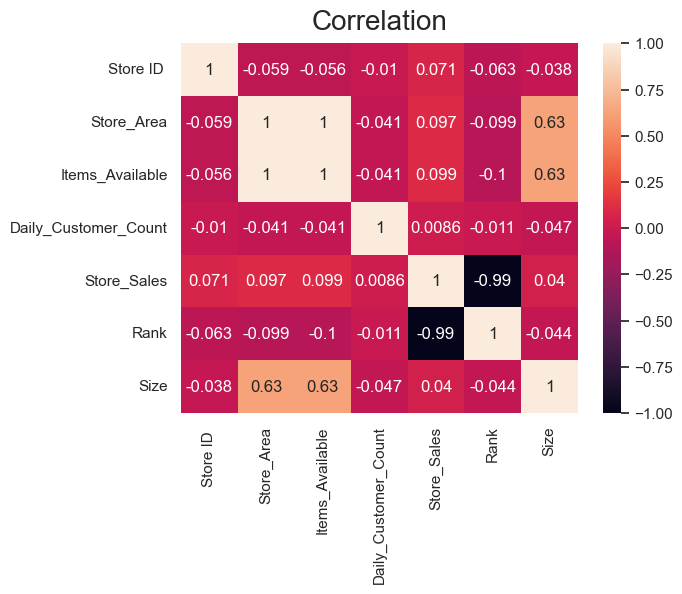

In [1006]:
# Creating a heatmap to check the correlation between the columns

corrmap = sns.heatmap(Store.corr(), vmin=-1, vmax=1, annot=True)
corrmap.set_title('Correlation', fontdict={'fontsize':20}, pad=10)

Items Available and Store Area are strongly correlated

In [722]:
# Ranking the Stores by the number of the sales

Store['Rank'] = Store['Store_Sales'].rank(ascending=False).astype(int)

In [1026]:
# TOP 5 by Sales

best_sales = Store.query('Rank <= 5').sort_values(by='Rank')

# Last 5 By Sales

worst_sales = Store.sort_values(by='Rank', ascending=False).head(5)

# Top 5 the most daily customer count

best_customer = Store.nlargest(5, ['Daily_Customer_Count'])

# Top 5 the least daily customer count

worst_customer = Store.nsmallest(5, ['Daily_Customer_Count'])

# Top 5 biggest stores

most_area = Store.nlargest(5, ['Store_Area'])

# Top 5 smallest stores

least_area = Store.nsmallest(5, ['Store_Area'])

In [1027]:
# Creating a column Size to compare sales between store sizes

Store['Size'] = 0

In [1028]:
# Creating a function to fill the values of the Size column with 0 if is < 1500 or 1 if is > 1500

def fill_area_size(row):
    if row['Store_Area'] <= 1000:
        return 1
    elif row['Store_Area'] > 1000 and row['Store_Area'] < 1200:
        return 2
    else:
        return 3

Store['Size'] = Store.apply(fill_area_size, axis=1)

In [1029]:
total_stores_1 = Store.groupby(by='Size').agg({'Store ID ': 'count'})['Store ID '][1]
total_stores_2 = Store.groupby(by='Size').agg({'Store ID ': 'count'})['Store ID '][2]
total_stores_3 = Store.groupby(by='Size').agg({'Store ID ': 'count'})['Store ID '][3]

average_sales_1 = Store.groupby(by='Size').agg({'Store_Sales': 'mean'})['Store_Sales'][1]
average_sales_2 = Store.groupby(by='Size').agg({'Store_Sales': 'mean'})['Store_Sales'][2]
average_sales_3 = Store.groupby(by='Size').agg({'Store_Sales': 'mean'})['Store_Sales'][3]

total_sales = Store['Store_Sales'].sum()

total_sales_1 = Store.query('Size == 1').agg({'Store_Sales': 'sum'}).astype(int)
total_sales_2 = Store.query('Size == 2').agg({'Store_Sales': 'sum'}).astype(int)
total_sales_3 = Store.query('Size == 3').agg({'Store_Sales': 'sum'}).astype(int)

average_available_1 = Store.groupby(by='Size').agg({'Items_Available': 'mean'})['Items_Available'][1]
average_available_2 = Store.groupby(by='Size').agg({'Items_Available': 'mean'})['Items_Available'][2]
average_available_3 = Store.groupby(by='Size').agg({'Items_Available': 'mean'})['Items_Available'][3]

total_available = Store['Store_Sales'].sum()

total_available_1 = Store.query('Size == 1').agg({'Items_Available': 'sum'}).astype(int)
total_available_2 = Store.query('Size == 2').agg({'Items_Available': 'sum'}).astype(int)
total_available_3 = Store.query('Size == 3').agg({'Items_Available': 'sum'}).astype(int)

table = [["<= 1000", total_stores_1, human_format(average_sales_1), human_format(total_sales_1[0]), human_format(average_available_1), human_format(total_available_1[0])],
         ["> 1000 <= 1200", total_stores_2, human_format(average_sales_2), human_format(total_sales_2[0]), human_format(average_available_2), human_format(total_available_2[0])],
         ["> 1200", total_stores_3, human_format(average_sales_3), human_format(total_sales_3[0]), human_format(average_available_3), human_format(total_available_3[0])]]
        
headers = ["Size", "Qty", "Average Sales", "Total Sales","Average Items Available", "Total Items Available"]

<b> Stats of each store by it's size group </b>

In [1030]:
print(tabulate(table, headers, tablefmt="rounded_grid", numalign='left'))

╭────────────────┬───────┬─────────────────┬───────────────┬───────────────────────────┬─────────────────────────╮
│ Size           │ Qty   │ Average Sales   │ Total Sales   │ Average Items Available   │ Total Items Available   │
├────────────────┼───────┼─────────────────┼───────────────┼───────────────────────────┼─────────────────────────┤
│ <= 1000        │ 22    │ 57.1K           │ 1.26M         │ 1.11K                     │ 24.4K                   │
├────────────────┼───────┼─────────────────┼───────────────┼───────────────────────────┼─────────────────────────┤
│ > 1000 <= 1200 │ 98    │ 57.7K           │ 5.65M         │ 1.35K                     │ 133K                    │
├────────────────┼───────┼─────────────────┼───────────────┼───────────────────────────┼─────────────────────────┤
│ > 1200         │ 776   │ 59.6K           │ 46.3M         │ 1.86K                     │ 1.44M                   │
╰────────────────┴───────┴─────────────────┴───────────────┴────────────────────

<b> Stats of each Store by its Sales, Daily Customers Count and Total Size </b>

In [1031]:
headers = ["Store ID ","Store_Area","Items_Available","Daily_Customer_Count","Store_Sales","Rank"]

print('---------------------------------------------------------------------------------------------------------')
print('-- Ranking by Sales --')
print(tabulate(best_sales, headers, tablefmt='rounded_grid', numalign='left'))
print('---------------------------------------------------------------------------------------------------------')
print('-- Ranking by Daily Customers Count --')
print(tabulate(best_customer, headers, tablefmt='rounded_grid', numalign='left'))
print('---------------------------------------------------------------------------------------------------------')
print('-- Ranking by Total Size --')
print(tabulate(most_area, headers, tablefmt='rounded_grid', numalign='left'))
print('---------------------------------------------------------------------------------------------------------')


---------------------------------------------------------------------------------------------------------
-- Ranking by Sales --
╭─────┬─────┬─────────────┬──────────────┬───────────────────┬────────────────────────┬───────────────┬────────╮
│     │     │ Store ID    │ Store_Area   │ Items_Available   │ Daily_Customer_Count   │ Store_Sales   │ Rank   │
├─────┼─────┼─────────────┼──────────────┼───────────────────┼────────────────────────┼───────────────┼────────┤
│ 649 │ 650 │ 1989        │ 2414         │ 860               │ 116320                 │ 1             │ 3      │
├─────┼─────┼─────────────┼──────────────┼───────────────────┼────────────────────────┼───────────────┼────────┤
│ 868 │ 869 │ 1775        │ 2104         │ 980               │ 105150                 │ 2             │ 3      │
├─────┼─────┼─────────────┼──────────────┼───────────────────┼────────────────────────┼───────────────┼────────┤
│ 432 │ 433 │ 1365        │ 1638         │ 680               │ 102920           

# Data Visualization

In [1032]:
Store.iplot(kind="box",
              keys=['Daily_Customer_Count', 'Items_Available', 'Store_Area'], boxpoints="outliers",
              title="Store Features Box Plot")

In [1033]:
Store.iplot(kind="box",
              keys=['Store_Sales'], boxpoints="outliers",
              title="Store Sales Box Plot")

In [1034]:
Store.iplot(kind="pie",
            labels="Size",
            values="Store_Sales",
            textinfo='percent+label', hole=.4, title="Percentage of the sales per store size")

In [1035]:
Store.iplot(kind="pie",
            labels="Size",
            values="Daily_Customer_Count",
            textinfo='percent+label', hole=.4, title="Percentage of the customers per store size")

In [1042]:
Store.astype('float64').iplot(kind="scatter", theme="white",x="Store_Area",y="Store_Sales",
            categories="Size", title='Store sales by Store Area', )

In [1043]:
Store.astype('float64').iplot(kind="scatter", theme="white",x="Daily_Customer_Count",y="Store_Sales",
            categories="Size", title='Store sales by Daily customers count', )

In [1044]:
Store.astype('float64').iplot(kind="scatter", theme="white",x="Items_Available",y="Store_Sales",
            categories="Size", title='Store sales by items available', )

In [1045]:
# Let's see top 5 stores with highest sales

highest_sales = pd.DataFrame(Store.nlargest(5, ['Store_Sales']))
highest_sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Rank,Size
649,650,1989,2414,860,116320,1,3
868,869,1775,2104,980,105150,2,3
432,433,1365,1638,680,102920,3,3
408,409,1303,1587,1310,102310,4,3
758,759,1486,1758,820,101820,5,3


In [1046]:
# show the top 5 stores with lowest sales

lowest_sales = pd.DataFrame(Store.nsmallest(5, ['Store_Sales']))
lowest_sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Rank,Size
31,32,1250,1508,990,14920,896,3
852,853,1477,1790,880,16370,895,3
775,776,1537,1877,660,17670,894,3
593,594,1624,1946,870,20270,893,3
352,353,1397,1686,850,21300,892,3
